# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [3]:
df.head(20)

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.00,0.00,0.0,0.000000e+00,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.00,0.00,0.0,3.272937e+03,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.00,0.00,0.0,6.249755e+03,6,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.00,0.00,0.0,1.435494e+04,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.00,0.00,0.0,9.151177e+04,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,6651.416562
5,72,М,Mega,50,0.0,0.00,0.00,0.0,9.369080e+04,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,2433.644326
6,46,NaN,<100,81,0.0,0.00,0.00,0.0,5.350795e+03,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,177.408546
7,62,NaN,<100,56,0.0,0.00,0.00,0.0,4.783591e+04,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,1284.357885
8,39,NaN,100-500,13,0.0,0.00,0.00,0.0,2.919013e+06,0,...,0.00,0.00,0.000000,0.00,0.00,0.00000,NaN,NaN,NaN,17397.286761
9,36,М,<100,154,0.0,0.00,32413.52,0.0,0.000000e+00,83,...,32413.52,34119.49,38051.374167,0.00,0.00,0.00000,NaN,3915.032892,4.383411,6065.052515


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [5]:
df.shape


(50000, 28)

In [6]:
df.age.max()

98

In [7]:
df.age.min()

4

In [8]:
#разбиваем на кластеры по возрасту, чтобы далее описывать их экономическую активность
ranges=[4,12,18,35,50,70,98]
labels=['child', 'teenager', 'youth', 'adult', 'middle_adult', 'retired_person']
vozrast=pd.cut(df.age,ranges,labels=labels)
df['vozrast']=vozrast

In [9]:
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,vozrast
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,retired_person
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952,adult
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539,middle_adult
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556,adult
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562,retired_person


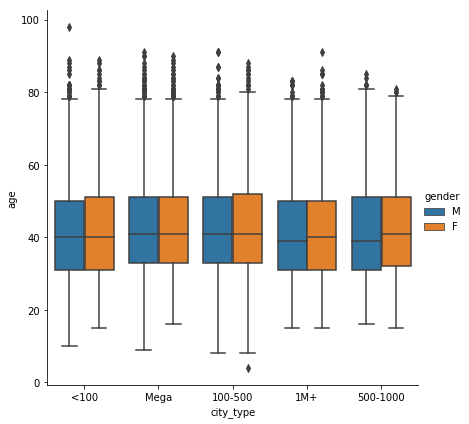

In [10]:
#исследуем выборку:разброс по возрасту и полу в зависимости от размера города проживания, 
#видим что группы,попавшие в выборку практически одинаковы, есть выбросы по возрасту, например, мужчина в малом городе
sns.catplot(
    x='city_type', 
    y='age', 
    data=df, 
    kind='box', 
    hue='gender',
    height=6, 
    aspect=1); 

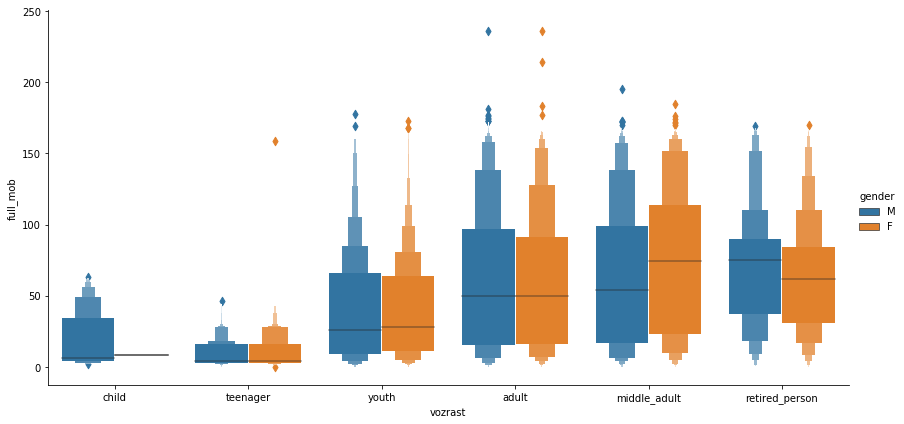

In [11]:
#длительность взаимоотношения с банком - от пола и возраста,
#здесь самы активные - взрослые и взрослые среднего возраста, и есть интересны исключения- дети- мальчики
sns.catplot(
    x='vozrast',
    y='full_mob',
    data=df,
    kind='boxen',
    hue='gender',
    height=6, 
    aspect=2);

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


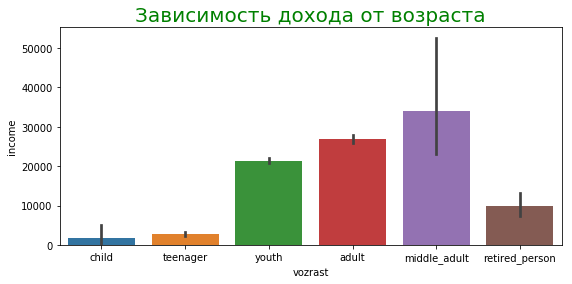

In [12]:
#Столбчатая диаграмма: зависимость дохода от возраста,
#самый высокий доход у  взрослых среднего возраста, но у них же и самый большой разброс
plt.figure(figsize=(9,4))

sns.barplot(x=df.vozrast, 
            y=df.income)
plt.title('Зависимость дохода от возраста', size=20, color='g');


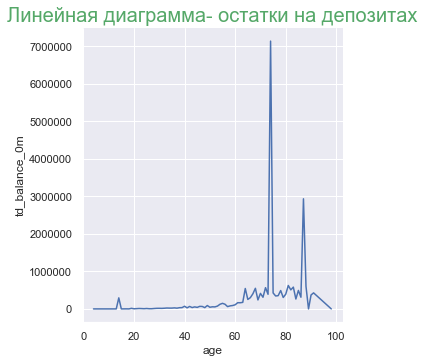

In [13]:
#исследуем в каком возрасте максимальные остатки на депозитах
sns.set(style='darkgrid')  

sns.relplot(x='age', 
            y='td_balance_0m',
           dashes=False, 
            markers=True,
            data=df,
            kind='line',
            ci=None)
plt.title('Линейная диаграмма- остатки на депозитах', size=20, color='g');

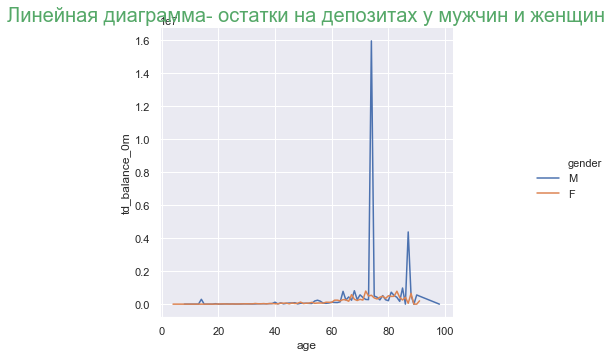

In [14]:
#исследуем в каком возрасте максимальные остатки на депозитах у мужчин и женщин, вывод- женщины не копят))
sns.set(style='darkgrid')  

sns.relplot(x='age', 
            y='td_balance_0m',
           dashes=False, 
            markers=True,
            data=df,
            kind='line',
            hue='gender',
            ci=None)
plt.title('Линейная диаграмма- остатки на депозитах у мужчин и женщин', size=20, color='g');

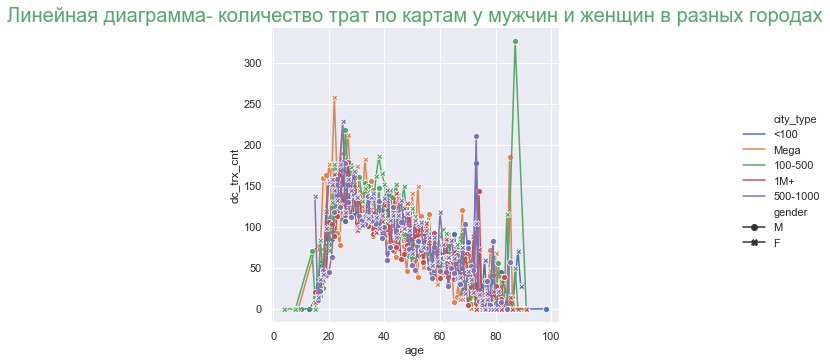

In [15]:
#исследуем количество трат по картам у мужчин и женщин разного возраста в разных горадах,
#видим основную массу трат в возрасте 25-40 лет везде, отдельные выбросы- у пожилых мужчин в городах 100-500
sns.set(style='darkgrid')  

sns.relplot(x='age', 
            y='dc_trx_cnt',
           dashes=False, 
            markers=True,
            data=df,
            kind='line',
            style='gender',
            hue='city_type',
            ci=None)
plt.title('Линейная диаграмма- количество трат по картам у мужчин и женщин в разных городах', size=20, color='g');

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


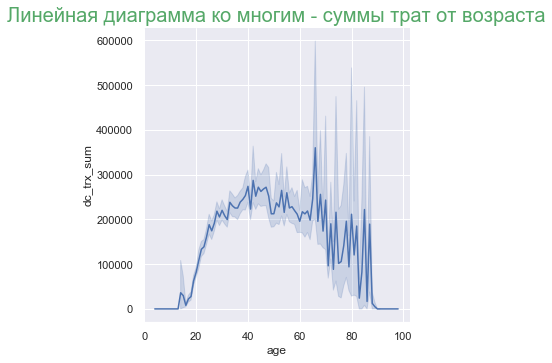

In [16]:
#Линейная диаграмма один ко многим- суммы трат по картам в зависмости от возраста
sns.set(style='darkgrid')  

sns.relplot(x='age', 
            y='dc_trx_sum',
#             dashes=False, 
#             markers=True,
            data=df,
            kind='line')
plt.title('Линейная диаграмма ко многим - суммы трат от возраста', size=20, color='g');

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


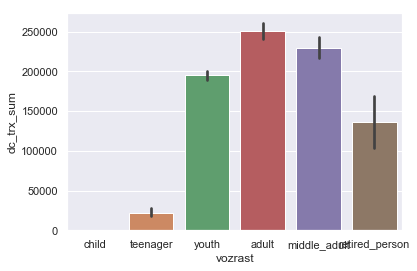

In [17]:
# концептуально- показывает ту же зависимость, но в столбчатой диаграмме
sns.barplot(df.vozrast, df.dc_trx_sum)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


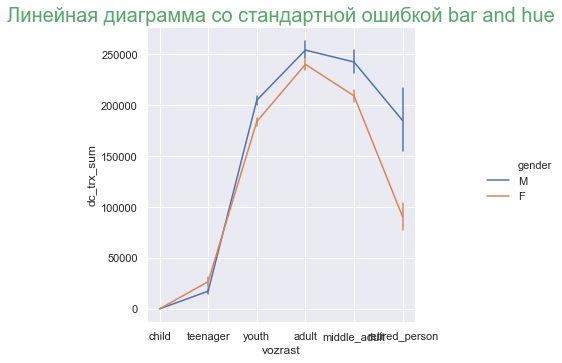

In [18]:
#Линейная диаграмма  - суммы трат в зависмости от возраста
sns.set(style='darkgrid')  

sns.relplot(x='vozrast', 
            y='dc_trx_sum',
            hue='gender',
            data=df,
            kind='line',
            err_style="bars", 
            ci=68)   # Standard Errors
plt.title('Линейная диаграмма со стандартной ошибкой bar and hue', size=20, color='g');


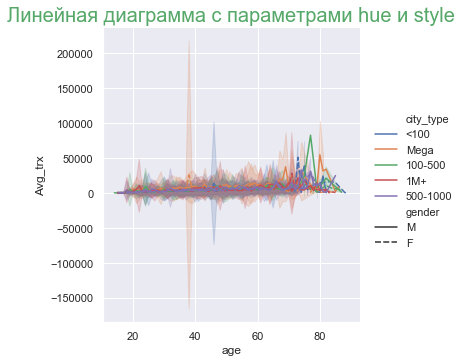

In [19]:
#Линейная диаграмма с параметрами hue и style- средний размер транзакции
sns.set(style='darkgrid')  

sns.relplot(x='age', 
            y='Avg_trx',
           hue='city_type', 
           style='gender', 
             ci='sd', 
            data=df,
            kind='line')
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

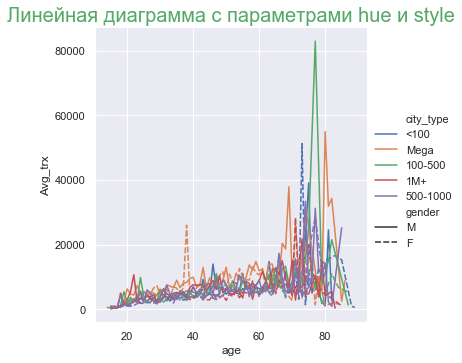

In [20]:
#Линейная диаграмма с параметрами hue и style- средний размер транзакции
sns.set(style='darkgrid')  

sns.relplot(x='age', 
            y='Avg_trx',
           hue='city_type', 
           style='gender', 
             ci=None, 
            data=df,
            kind='line')
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

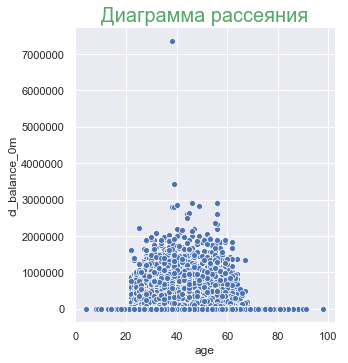

In [21]:
#Диграмма рассеяния- потребительский кредит  от возраста
sns.relplot(
    x='age', 
   y='cl_balance_0m', 
    data=df, 
    kind='scatter')
plt.title('Диаграмма рассеяния', size=20, color='g');

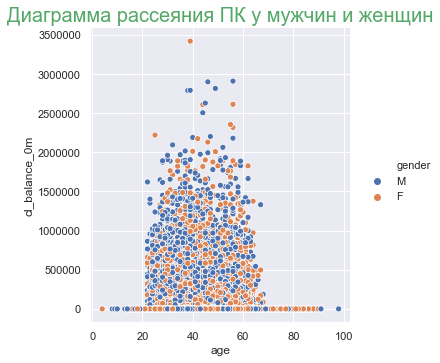

In [22]:
#Диграмма рассеяния- потребительский кредит  от возраста у мужчин и женщин
sns.relplot(
    x='age', 
   y='cl_balance_0m', 
    data=df, 
    hue='gender',
    kind='scatter')
plt.title('Диаграмма рассеяния ПК у мужчин и женщин', size=20, color='g');

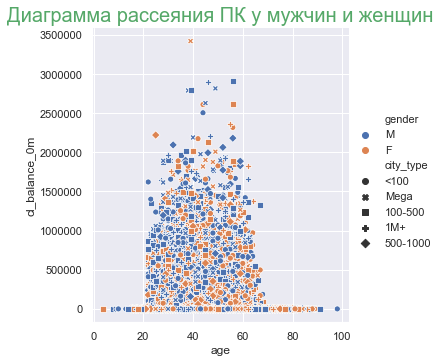

In [23]:
#Диграмма рассеяния- потребительский кредит  от возраста у мужчин и женщин
sns.relplot(
    x='age', 
   y='cl_balance_0m', 
    data=df, 
    hue='gender',
    style='city_type',
    kind='scatter')
plt.title('Диаграмма рассеяния ПК у мужчин и женщин', size=20, color='g');

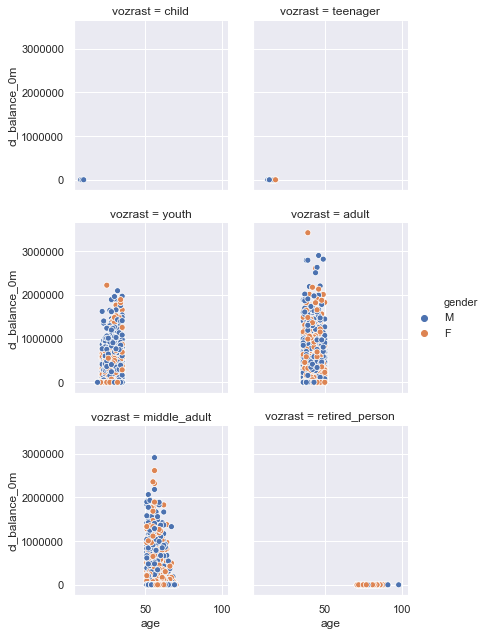

In [24]:
#Диграмма рассеяния- потребительский кредит  от возраста у мужчин и женщин  в разных возрасных группах
sns.relplot(
    x='age', 
   y='cl_balance_0m', 
    data=df, 
    hue='gender',
    col='vozrast',
    col_wrap=2,
    height=3,
    kind='scatter');

In [ ]:
#Категорийные диаграммы очень сильно потребляют эл.энергию ПК...
sns.catplot(
    x='age', 
    y='loan_balance_0m', 
    data=df, 
    hue='gender',
    order='vozrast', 
    palette='Set1', 
    height=4,
    aspect=2) 
plt.title('stripplot', size=20, color='g');

In [ ]:
sns.catplot(
    x='age', 
    y='loan_balance_0m', 
    data=df, 
    hue='gender',
    order=vozrast, 
    kind='swarm',
    height=4, 
    aspect=2)
plt.title('swarmplot', size=20, color='g');

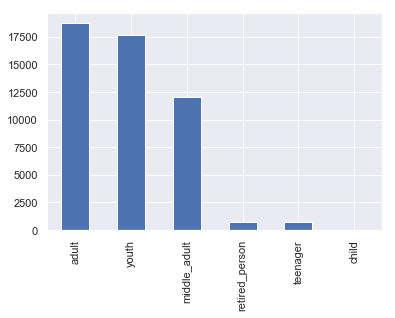

In [21]:
pd.value_counts(df['vozrast']).plot.bar()

In [22]:
snacks_sales['Month'] = pd.DatetimeIndex(snacks_sales['Date']).month
Quarter_Mapping = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3, 10:4, 11:4, 12:4}
snacks_sales['Quarter'] = snacks_sales['Month'].map(Quarter_Mapping)


NameError: name 'snacks_sales' is not defined

In [24]:
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi,vozrast
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,retired_person
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952,adult
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539,middle_adult
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556,adult
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562,retired_person
